# Import packages and data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling 


user_table = pd.read_csv('/Users/jeylan/Documents/software_pricing/user_table.csv')
test_results = pd.read_csv('/Users/Jeylan/Documents/software_pricing/test_results.csv')
test_results.drop(test_results.columns[0], axis=1, inplace=True)

In [83]:
user_table

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [84]:
test_results

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0
...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39.0,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39.0,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39.0,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39.0,0


# Merge data

In [85]:
df = pd.merge(test_results, user_table, on='user_id')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275616 entries, 0 to 275615
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           275616 non-null  int64  
 1   timestamp         275322 non-null  object 
 2   source            275344 non-null  object 
 3   device            275616 non-null  object 
 4   operative_system  257839 non-null  object 
 5   test              275616 non-null  int64  
 6   price             275616 non-null  float64
 7   converted         275616 non-null  int64  
 8   city              275616 non-null  object 
 9   country           275616 non-null  object 
 10  lat               275616 non-null  float64
 11  long              275616 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 27.3+ MB


In [87]:
df

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
275611,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59.0,0,Joliet,USA,41.53,-88.12
275612,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39.0,0,Bell Gardens,USA,33.97,-118.15
275613,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39.0,0,West Seneca,USA,42.84,-78.75
275614,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39.0,0,Walnut Creek,USA,37.90,-122.04


# Missing values

In [88]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report')
#profile.to_file(output_file='profile.html')

Missing values

Missings occur for time stamp (.1 %), source (<.1 %) and operating system (6.4 %).

In [89]:
 df['country'].describe()

count     275616
unique         1
top          USA
freq      275616
Name: country, dtype: object

In [90]:
 df['user_id'].nunique()

275616

I will delete username since they are all unique values, country as there is only one value and latitude and longitude as they are already proxied by city. 

In [91]:
df = df.drop(['user_id', 'country'], axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275616 entries, 0 to 275615
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         275322 non-null  object 
 1   source            275344 non-null  object 
 2   device            275616 non-null  object 
 3   operative_system  257839 non-null  object 
 4   test              275616 non-null  int64  
 5   price             275616 non-null  float64
 6   converted         275616 non-null  int64  
 7   city              275616 non-null  object 
 8   lat               275616 non-null  float64
 9   long              275616 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.1+ MB


In [93]:
df['source'].describe()

count             275344
unique                12
top       direct_traffic
freq               52548
Name: source, dtype: object

Replace missing values with the mode within that column

In [94]:
df = df.fillna(df.mode().iloc[0])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275616 entries, 0 to 275615
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         275616 non-null  object 
 1   source            275616 non-null  object 
 2   device            275616 non-null  object 
 3   operative_system  275616 non-null  object 
 4   test              275616 non-null  int64  
 5   price             275616 non-null  float64
 6   converted         275616 non-null  int64  
 7   city              275616 non-null  object 
 8   lat               275616 non-null  float64
 9   long              275616 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.1+ MB


In [96]:
df['source'].describe()

count             275616
unique                12
top       direct_traffic
freq               52820
Name: source, dtype: object

In [97]:
df.mode()

,timestamp,source,device,operative_system,test,price,converted,city,lat,long
0,2015-04-12 11:51:16,direct_traffic,mobile,windows,0,39.0,0,New York,40.67,-73.94


Determining the quality of time stamps

In [98]:
df.timestamp.unique()


array(['2015-05-08 03:38:34', '2015-05-10 21:08:46',
       '2015-04-04 15:01:23', ..., '2015-04-12 05:32:14',
       '2015-05-05 13:31:19', '2015-04-24 10:13:45'], dtype=object)

In [99]:
df[0:50]

,timestamp,source,device,operative_system,test,price,converted,city,lat,long
0,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,42.89,-78.86
1,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,44.68,-93.24
2,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,41.38,-81.73
3,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,35.07,-78.90
4,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,39.95,-86.02
5,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39.0,0,New York,40.67,-73.94
6,2015-03-15 08:19:29,ads-bing,mobile,android,1,59.0,1,East Orange,40.77,-74.21
7,2015-03-28 12:28:10,ads_facebook,web,windows,1,59.0,0,Dayton,39.78,-84.20
8,2015-04-24 12:42:18,ads_facebook,web,windows,1,59.0,0,Richmond,37.53,-77.47
9,2015-04-17 13:30:04,ads-google,web,windows,0,39.0,0,Bloomfield Township,42.58,-83.27


In [100]:
df[-50:]

,timestamp,source,device,operative_system,test,price,converted,city,lat,long
275566,2015-03-15 12:47:23,direct_traffic,mobile,android,0,39.0,0,Reno,39.54,-119.82
275567,2015-03-26 11:11:47,ads_facebook,web,windows,1,59.0,0,Springfield,39.78,-89.64
275568,2015-05-15 02:33:27,ads-bing,mobile,iOS,0,39.0,0,Oakland,37.77,-122.22
275569,2015-03-21 12:16:06,ads-google,mobile,android,0,39.0,0,Plano,33.05,-96.75
275570,2015-04-27 15:26:44,ads_facebook,mobile,android,0,39.0,0,Buffalo,42.89,-78.86
275571,2015-04-22 02:58:30,ads_other,mobile,android,0,39.0,0,Portsmouth,36.86,-76.36
275572,2015-05-25 15:09:25,ads_facebook,mobile,android,1,59.0,0,Simi Valley,34.26,-118.75
275573,2015-05-16 03:06:32,ads-google,mobile,iOS,0,39.0,0,Chula Vista,32.63,-117.04
275574,2015-05-29 15:33:24,friend_referral,mobile,android,1,59.0,1,Sioux City,42.50,-96.39
275575,2015-05-06 04:07:25,direct_traffic,mobile,windows,1,59.0,0,Garden Grove,33.78,-117.96


Some minutes and seconds in timestamp are '60' and so I replace them with '0'

In [101]:
df['timestamp'] = df['timestamp'].str.replace('60', '00')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275616 entries, 0 to 275615
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         275616 non-null  object 
 1   source            275616 non-null  object 
 2   device            275616 non-null  object 
 3   operative_system  275616 non-null  object 
 4   test              275616 non-null  int64  
 5   price             275616 non-null  float64
 6   converted         275616 non-null  int64  
 7   city              275616 non-null  object 
 8   lat               275616 non-null  float64
 9   long              275616 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.1+ MB


I then convert string date to timestamp


In [103]:
import time
import datetime

df['timestamp'] =pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275616 entries, 0 to 275615
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         275352 non-null  datetime64[ns]
 1   source            275616 non-null  object        
 2   device            275616 non-null  object        
 3   operative_system  275616 non-null  object        
 4   test              275616 non-null  int64         
 5   price             275616 non-null  float64       
 6   converted         275616 non-null  int64         
 7   city              275616 non-null  object        
 8   lat               275616 non-null  float64       
 9   long              275616 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 23.1+ MB


In [105]:
df.isnull().sum()

timestamp           264
source                0
device                0
operative_system      0
test                  0
price                 0
converted             0
city                  0
lat                   0
long                  0
dtype: int64

I drop bad timestamp conversions. 

In [106]:
df = df.dropna()

I create new variables based off of timestamp

In [107]:
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour
df['year'] = df['timestamp'].dt.year
df['weeknum'] = df['timestamp'].dt.week


<ipython-input-107-35cdecb79371>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weeknum'] = df['timestamp'].dt.week


Dropping timestamp

In [108]:
df = df.drop(['timestamp'], axis=1)

Making sure data is consistent

In [109]:
data_crosstab = pd.crosstab(df['test'], 
                            df['price'],  
                               margins = False) 


In [110]:
data_crosstab

price,39.0,59.0,324680531.0,325355094.0,325373202.0,326160834.0,326183619.0,326312463.0,326480681.0,326609905.0,...,996779567.0,997418660.0,997482836.0,997796945.0,998462170.0,998765098.0,999139431.0,999173836.0,999762858.0,999884279.0
test,,,,,,,,,,,,,,,,,,,,,
0,174387,186,1,1,1,0,0,1,1,0,...,1,1,1,0,1,0,1,1,0,1
1,134,97972,0,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [111]:
df['price'].describe()

count    2.753520e+05
mean     6.472026e+06
std      6.810287e+07
min      3.900000e+01
25%      3.900000e+01
50%      3.900000e+01
75%      5.900000e+01
max      9.998843e+08
Name: price, dtype: float64

Removing inconsistent information

In [112]:
df = df[((df['test'] == 1) & (df['price']==59.0)) | ((df['test'] == 0) & (df['price']==39.0))]


In [113]:
data_crosstab = pd.crosstab(df['test'], 
                            df['price'],  
                               margins = False) 


In [114]:
data_crosstab

price,39.0,59.0
test,,
0,174387,0
1,0,97972


Because price and test contain the same information, I'll only keep test. 

In [115]:
df = df.drop(['price'], axis=1)

In [116]:
df

,source,device,operative_system,test,converted,city,lat,long,month,weekday,hour,year,weeknum
0,ads_facebook,mobile,iOS,0,0,Buffalo,42.89,-78.86,5,4,3,2015,19
1,seo-google,mobile,android,0,0,Lakeville,44.68,-93.24,5,6,21,2015,19
2,ads-bing,mobile,android,0,0,Parma,41.38,-81.73,4,5,15,2015,14
3,direct_traffic,mobile,iOS,1,0,Fayetteville,35.07,-78.90,5,3,7,2015,19
4,ads_facebook,web,mac,0,0,Fishers,39.95,-86.02,5,6,11,2015,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275611,seo-google,web,windows,1,0,Joliet,41.53,-88.12,5,2,11,2015,21
275612,direct_traffic,web,windows,0,0,Bell Gardens,33.97,-118.15,3,0,23,2015,12
275613,ads-google,web,mac,0,0,West Seneca,42.84,-78.75,4,5,1,2015,15
275614,friend_referral,mobile,android,0,0,Walnut Creek,37.90,-122.04,5,3,5,2015,20


# Exploratory analysis

In [117]:
df['test'].value_counts()

0    174387
1     97972
Name: test, dtype: int64

In [118]:
df['converted'].value_counts()

0    267397
1      4962
Name: converted, dtype: int64

In [119]:
df.groupby('test').mean()['converted']

test
0    0.019766
1    0.015464
Name: converted, dtype: float64

In [120]:
df[['test', 'converted']].corr()

,test,converted
test,1.00000,-0.01544
converted,-0.01544,1.00000


Lets explore seasonality. 

In [121]:
df['year'].nunique()


1

I will drop year since it only includes one value

In [122]:
df = df.drop(['year'], axis=1)

In [123]:
df['month'].nunique()


3

In [124]:
df['month'].describe()

count    272359.000000
mean          4.042099
std           0.821985
min           3.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: month, dtype: float64

The test was only run during a three-month period, March to May. 

In [125]:
df.groupby('month').mean()['converted']

month
3    0.018169
4    0.018337
5    0.018156
Name: converted, dtype: float64

In [126]:
df.groupby('month').mean()['test']

month
3    0.361689
4    0.356781
5    0.360606
Name: test, dtype: float64

The conversation rate during this time was quite similar. The test was also generally consistent throughout.

In [127]:
df.groupby('operative_system').describe()['converted']

,count,mean,std,min,25%,50%,75%,max
operative_system,,,,,,,,
android,64492.0,0.014839,0.120909,0.0,0.0,0.0,0.0,1.0
anroid,69.0,0.014493,0.120386,0.0,0.0,0.0,0.0,1.0
apple,23.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
i0S,97.0,0.010309,0.101535,0.0,0.0,0.0,0.0,1.0
iOS,81896.0,0.022248,0.147489,0.0,0.0,0.0,0.0,1.0
mac,21553.0,0.024266,0.153877,0.0,0.0,0.0,0.0,1.0
windows,104146.0,0.015920,0.125167,0.0,0.0,0.0,0.0,1.0
wnddows,83.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [128]:
df.groupby('weekday').describe()['converted']

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,16502.0,0.017695,0.131844,0.0,0.0,0.0,0.0,1.0
1,16908.0,0.016264,0.126495,0.0,0.0,0.0,0.0,1.0
2,16189.0,0.017790,0.132191,0.0,0.0,0.0,0.0,1.0
3,31782.0,0.018375,0.134306,0.0,0.0,0.0,0.0,1.0
4,79055.0,0.018531,0.134864,0.0,0.0,0.0,0.0,1.0
5,63815.0,0.018099,0.133311,0.0,0.0,0.0,0.0,1.0
6,48108.0,0.018770,0.135714,0.0,0.0,0.0,0.0,1.0


In [129]:
df.groupby('hour').describe()['converted']

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,4893.0,0.016350,0.126830,0.0,0.0,0.0,0.0,1.0
1,4915.0,0.018718,0.135542,0.0,0.0,0.0,0.0,1.0
2,5018.0,0.020725,0.142478,0.0,0.0,0.0,0.0,1.0
3,4929.0,0.014810,0.120805,0.0,0.0,0.0,0.0,1.0
4,4638.0,0.024148,0.153526,0.0,0.0,0.0,0.0,1.0
5,4967.0,0.013489,0.115368,0.0,0.0,0.0,0.0,1.0
6,4766.0,0.016995,0.129267,0.0,0.0,0.0,0.0,1.0
7,9468.0,0.018695,0.135451,0.0,0.0,0.0,0.0,1.0
8,14259.0,0.020338,0.141159,0.0,0.0,0.0,0.0,1.0


In [130]:
df.groupby('device').mean()['converted']

device
mobile    0.018398
web       0.017961
Name: converted, dtype: float64

In [131]:
df.groupby('source').describe()['converted']

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
ads-bing,19607.0,0.011935,0.108594,0.0,0.0,0.0,0.0,1.0
ads-google,50942.0,0.021515,0.145094,0.0,0.0,0.0,0.0,1.0
ads-yahoo,6499.0,0.014618,0.120026,0.0,0.0,0.0,0.0,1.0
ads_facebook,45772.0,0.021148,0.143880,0.0,0.0,0.0,0.0,1.0
ads_other,25748.0,0.014525,0.119645,0.0,0.0,0.0,0.0,1.0
direct_traffic,52200.0,0.012165,0.109622,0.0,0.0,0.0,0.0,1.0
friend_referral,17785.0,0.038010,0.191225,0.0,0.0,0.0,0.0,1.0
seo-bing,1843.0,0.021704,0.145754,0.0,0.0,0.0,0.0,1.0
seo-google,19905.0,0.016780,0.128448,0.0,0.0,0.0,0.0,1.0


Across sources friend referall is the most effective way to convert .

In [132]:
df['converted'].value_counts()

0    267397
1      4962
Name: converted, dtype: int64

# Question 1

I perform a chi-squared test to see if there is a statistically significant relationship between conversion and testing. We've already seen that the test group is less likely to convert than the control

In [133]:
df.groupby('test').count()['converted']

test
0    174387
1     97972
Name: converted, dtype: int64

In [134]:
df.groupby('test', as_index=False)['converted'].mean()


,test,converted
0,0,0.019766
1,1,0.015464


In [135]:
contingency= pd.crosstab(df['test'], df['converted']) 
contingency


converted,0,1
test,,
0,170940,3447
1,96457,1515


In [136]:
from scipy.stats import chi2_contingency

contigency_pct = pd.crosstab(df['test'], df['converted'], margins = False, normalize='index')
contigency_pct


converted,0,1
test,,
0,0.980234,0.019766
1,0.984536,0.015464


In [137]:
c, p, dof, expected = chi2_contingency(contingency) 


In [138]:
print(p)

8.769104211212098e-16


We can see that the difference is statistically significant: the control is more likely to convert.

Which group produced more income during this three-month period?

In [139]:
39*3447 

134433

In [140]:
1515*59

89385

In [141]:
df

,source,device,operative_system,test,converted,city,lat,long,month,weekday,hour,weeknum
0,ads_facebook,mobile,iOS,0,0,Buffalo,42.89,-78.86,5,4,3,19
1,seo-google,mobile,android,0,0,Lakeville,44.68,-93.24,5,6,21,19
2,ads-bing,mobile,android,0,0,Parma,41.38,-81.73,4,5,15,14
3,direct_traffic,mobile,iOS,1,0,Fayetteville,35.07,-78.90,5,3,7,19
4,ads_facebook,web,mac,0,0,Fishers,39.95,-86.02,5,6,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...
275611,seo-google,web,windows,1,0,Joliet,41.53,-88.12,5,2,11,21
275612,direct_traffic,web,windows,0,0,Bell Gardens,33.97,-118.15,3,0,23,12
275613,ads-google,web,mac,0,0,West Seneca,42.84,-78.75,4,5,1,15
275614,friend_referral,mobile,android,0,0,Walnut Creek,37.90,-122.04,5,3,5,20


The control group also produced more income. 

# Question 2

Which features are most important?

Exploring geospatial data

In [142]:
df['lat'].describe()

count    272359.000000
mean         37.112305
std           5.209479
min          19.700000
25%          33.660000
50%          37.740000
75%          40.700000
max          61.180000
Name: lat, dtype: float64

In [143]:
df['long'].describe()

count    272359.000000
mean        -93.978449
std          18.086523
min        -157.800000
25%        -112.200000
50%         -88.930000
75%         -78.910000
max          30.310000
Name: long, dtype: float64

/Users/jeylan/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lat', ylabel='long'>

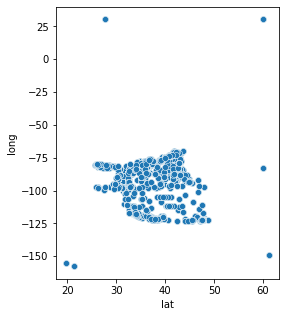

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,5))
sns.scatterplot(df['lat'], df['long'])


In [148]:
import folium

# create the map.
map_pickup = folium.Map( location=[39.8283,-98.5795])

# adding the latitude and longitude points to the map.
df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["long"]] ).add_to(map_pickup), axis=1)

# display the map: just ask for the object representation in juypter notebook.
#map_pickup



0         <folium.vector_layers.CircleMarker object at 0...
1         <folium.vector_layers.CircleMarker object at 0...
2         <folium.vector_layers.CircleMarker object at 0...
3         <folium.vector_layers.CircleMarker object at 0...
4         <folium.vector_layers.CircleMarker object at 0...
                                ...                        
275611    <folium.vector_layers.CircleMarker object at 0...
275612    <folium.vector_layers.CircleMarker object at 0...
275613    <folium.vector_layers.CircleMarker object at 0...
275614    <folium.vector_layers.CircleMarker object at 0...
275615    <folium.vector_layers.CircleMarker object at 0...
Length: 272359, dtype: object

I decide to group locations into clusters that can be then used in modeling

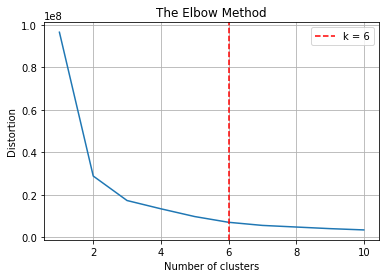

In [151]:
from sklearn import preprocessing, cluster
import scipy
import numpy as np
import matplotlib.pyplot as plt


X = df[['lat','long']]
max_k = 10

## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)

## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color='red', label= 'k = ' + str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)

plt.show()

The optimal number of clusters is 6. 

Now I use a K-means model to build clusters (with 6 centroids).

In [155]:
k = 6

model = cluster.KMeans(n_clusters=k, init='k-means++')

X = df[["lat","long"]]

## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

## find real centroids

closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)

dtf_X["centroids"] = 0

for i in closest:
    dtf_X["centroids"].iloc[i] = 1
    
## add clustering info to the original dataset
df[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
df

/Users/jeylan/anaconda3/envs/insight/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,source,device,operative_system,test,converted,city,lat,long,month,weekday,hour,weeknum,cluster,centroids
0,ads_facebook,mobile,iOS,0,0,Buffalo,42.89,-78.86,5,4,3,19,0,0
1,seo-google,mobile,android,0,0,Lakeville,44.68,-93.24,5,6,21,19,2,0
2,ads-bing,mobile,android,0,0,Parma,41.38,-81.73,4,5,15,14,2,0
3,direct_traffic,mobile,iOS,1,0,Fayetteville,35.07,-78.90,5,3,7,19,4,0
4,ads_facebook,web,mac,0,0,Fishers,39.95,-86.02,5,6,11,21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275611,seo-google,web,windows,1,0,Joliet,41.53,-88.12,5,2,11,21,2,0
275612,direct_traffic,web,windows,0,0,Bell Gardens,33.97,-118.15,3,0,23,12,1,0
275613,ads-google,web,mac,0,0,West Seneca,42.84,-78.75,4,5,1,15,0,0
275614,friend_referral,mobile,android,0,0,Walnut Creek,37.90,-122.04,5,3,5,20,1,0


/Users/jeylan/anaconda3/envs/insight/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


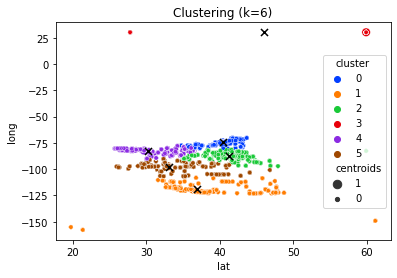

In [157]:
## plot

fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
                                                 
th_centroids = model.cluster_centers_
                                                 
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x")


In [158]:
df['cluster'].value_counts()

1    76952
0    68460
2    48276
5    45419
4    32918
3      334
Name: cluster, dtype: int64

In [171]:
import folium

color = "cluster"
data = df.copy()

## create color column
lst_colors=["red","green","orange", "blue", "yellow", "purple"]
lst_elements = sorted(list(df[color].unique()))
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

# create the map.
map_pickup = folium.Map( location=[39.8283,-98.5795])

# adding the latitude and longitude points to the map.
data.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["long"]], color=row["color"] ).add_to(map_pickup), axis=1)


# display the map: just ask for the object representation in juypter notebook.
#map_pickup

0         <folium.vector_layers.CircleMarker object at 0...
1         <folium.vector_layers.CircleMarker object at 0...
2         <folium.vector_layers.CircleMarker object at 0...
3         <folium.vector_layers.CircleMarker object at 0...
4         <folium.vector_layers.CircleMarker object at 0...
                                ...                        
275611    <folium.vector_layers.CircleMarker object at 0...
275612    <folium.vector_layers.CircleMarker object at 0...
275613    <folium.vector_layers.CircleMarker object at 0...
275614    <folium.vector_layers.CircleMarker object at 0...
275615    <folium.vector_layers.CircleMarker object at 0...
Length: 272359, dtype: object

In [173]:
#map_pickup

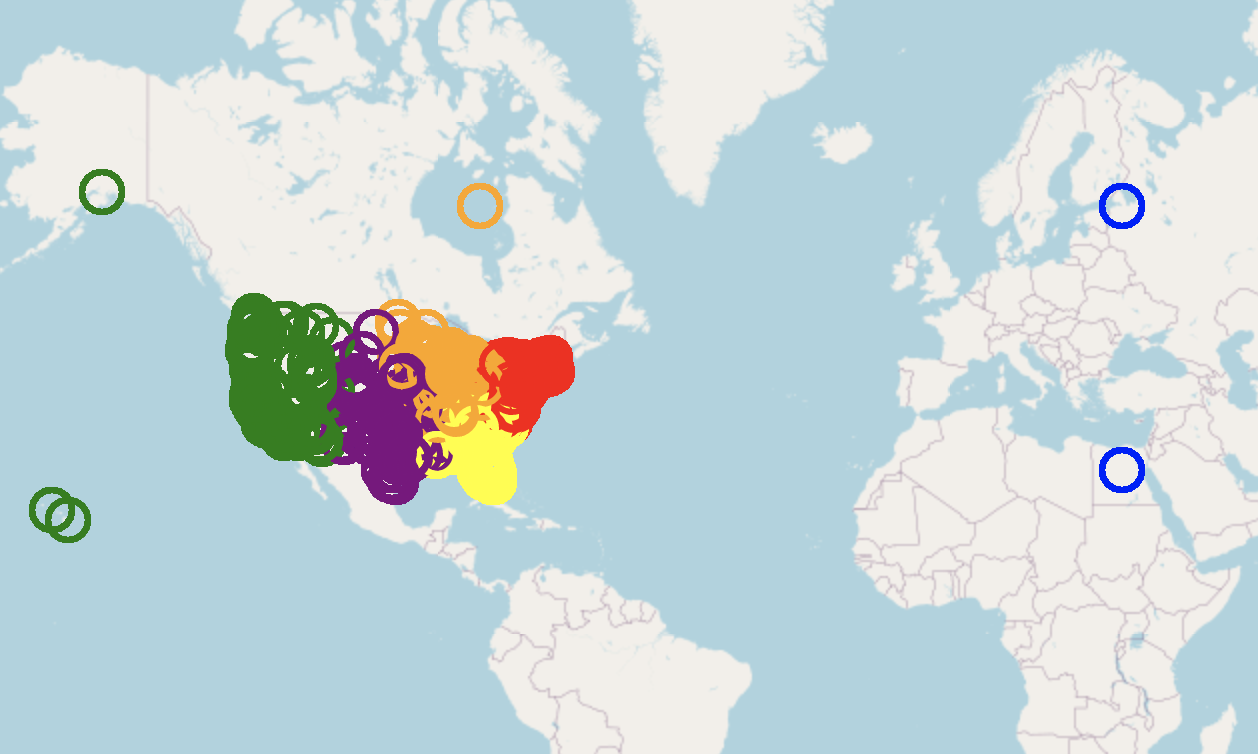

In [175]:
from IPython.display import Image
Image(filename="/Users/jeylan/Documents/software_pricing/img.png")


The clusters identify several regions that generally correspond with the Pacific west (1), the plains area (5), midwest (2), south (4), northeast (0) and then parts of Europe and Africa (3).

,source,device,operative_system,test,converted,city,lat,long,month,weekday,hour,weeknum,cluster,centroids
3,direct_traffic,mobile,iOS,1,0,Fayetteville,35.07,-78.90,5,3,7,19,4,0
15,ads-google,mobile,iOS,0,0,Deerfield Beach,26.31,-80.12,3,6,13,10,4,0
22,ads-yahoo,mobile,iOS,1,0,Johnson City,36.33,-82.37,3,5,11,13,4,0
28,ads_other,mobile,iOS,0,0,North Charleston,32.91,-80.04,4,4,11,16,4,0
40,ads_other,mobile,android,0,0,Egypt Lake-Leto,28.02,-82.50,4,2,9,16,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275583,seo_facebook,mobile,iOS,1,0,Coral Springs,26.27,-80.26,3,3,10,10,4,0
275584,direct_traffic,mobile,iOS,0,0,Jacksonville,30.33,-81.66,4,3,10,17,4,0
275588,ads_facebook,mobile,iOS,0,0,Hollywood,26.03,-80.16,5,5,11,20,4,0
275602,ads_other,web,windows,1,0,Athens-Clarke,33.95,-83.39,5,1,13,19,4,0
